<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null float64
cpt         303 non-null float64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null float64
restecg     303 non-null float64
thalach     303 non-null float64
exang       303 non-null float64
oldpeak     303 non-null float64
slope       303 non-null float64
ca          299 non-null float64
thal        301 non-null float64
num         303 non-null int64
dtypes: float64(13), int64(1)
memory usage: 35.5 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 0 to 293
Data columns (total 14 columns):
age         294 non-null int64
sex         294 non-null int64
cpt         294 non-null int64
trestbps    293 non-null float64
chol        271 non-null float64
fbs         286 non-null float64
restecg     293 non-null float64
thalach     293 non-null float64
exang       293 non-

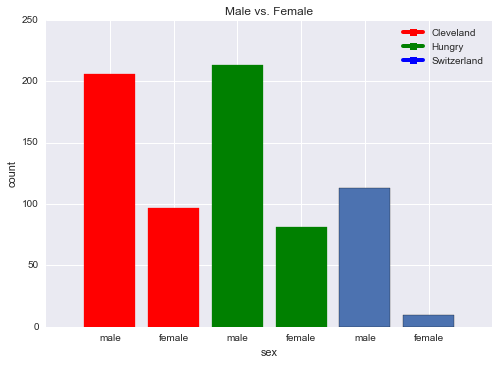

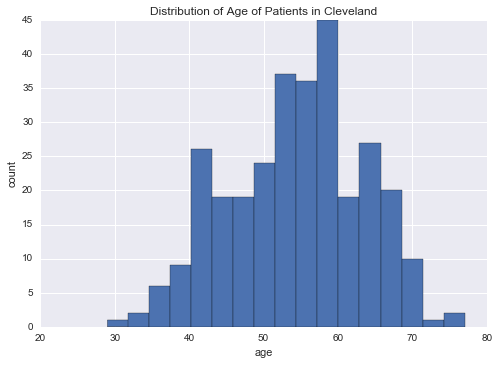

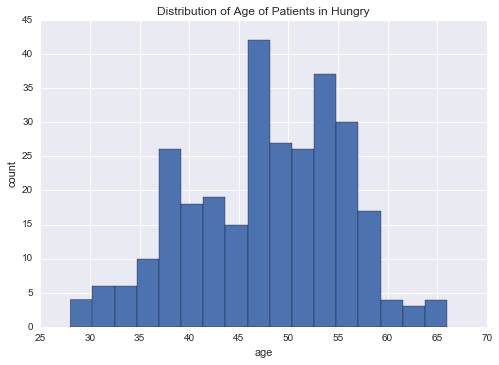

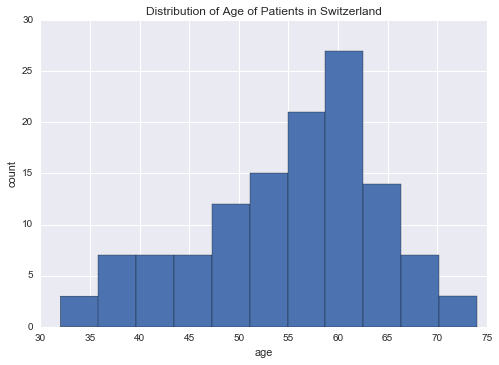

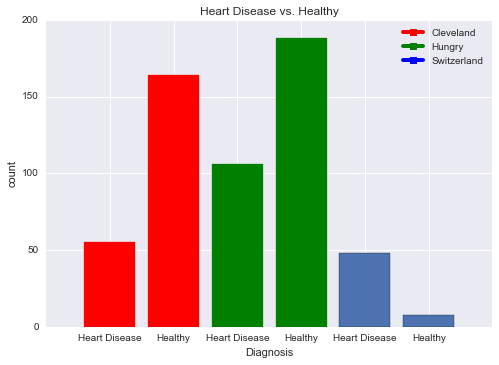

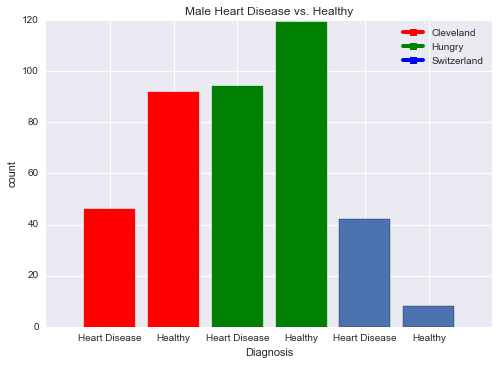

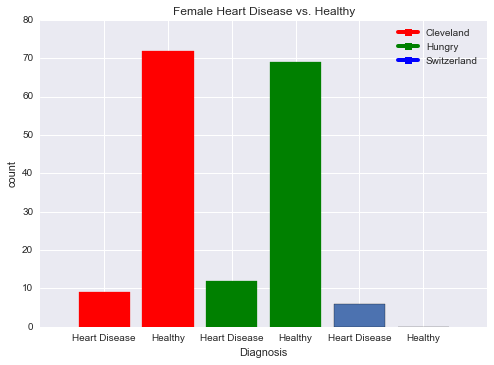

In [62]:
'This cell is dedicated to exploratory data analysis of the three heart disease datasets provided from the uci machine learning database'
'The url to the data is provided: http://archive.ics.uci.edu/ml/datasets/heart+disease'

%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

''' Below is a legend for the column names of each heart disease data set

age: age in years
sex: sex (1 = male; 0 = female) 
cp: chest pain type 
-- Value 1: typical angina 
-- Value 2: atypical angina 
import seaborn as sns

from matplotlib.lines import Line2D

-- Value 3: non-anginal pain 
-- Value 4: asymptomatic 
trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
chol: serum cholestoral in mg/dl 
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
restecg: resting electrocardiographic results
thalach: maximum heart rate achieved
exang: exercise induced angina (1 = yes; 0 = no)
oldpeak = ST depression induced by exercise relative to rest 
slope: the slope of the peak exercise ST segment 
-- Value 1: upsloping 
--f Value 2: flat 
-- Value 3: downsloping 
ca: number of major vessels (0-3) colored by flourosopy 
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
num: diagnosis of heart disease (angiographic disease status) 
-- Value 0: < 50% diameter narrowing 
-- Value 1: > 50% diameter narrowing 

'''
#Labeled Dataframes for all 3 data sets are created below.

col_names = ['age','sex','cpt','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']

df_c = pd.read_csv('processed.cleveland.data', header= None, names= col_names, na_values = '?')
df_h = pd.read_csv('processed.hungarian.data', header= None, names= col_names, na_values = '?')
df_s = pd.read_csv('processed.switzerland.data',header= None, names= col_names, na_values = '?')

# Information on all of the datasets
df_c.info()
df_h.info()
df_s.info()

# .info() shows that there are no missing values. The dataframes are printed below to doube check.
print 'Cleveland', df_c
print 'Hungary', df_h
print 'Switzerland', df_s

# The describe method is used to glean more information about the data sets
print 'Cleveland', df_c.describe()
print 'Hungary', df_h.describe()
print 'Switzerland', df_s.describe()
# Further inspection shows that there are many missing values in the Hungray and Switzerland set in the form of question marks(?).

# A Bar graph that show the difference between male and female subsets of the data is created below.

# Counting the number of males and females from each dataset
male_c = sum(df_c['sex'] == 1)
female_c = sum(df_c['sex'] == 0)

male_h = sum(df_h['sex'] == 1)
female_h = sum(df_h['sex'] == 0)

male_s = sum(df_s['sex'] == 1)
female_s = sum(df_s['sex'] == 0)

# The counted values above are used as the heights of the bars which are put into the list sex. The graph labels and number of labels are created below as well. 
sex = [male_c, female_c, male_h, female_h, male_s, female_s]
sex_labels = ['male', 'female', 'male', 'female', 'male', 'female']
y_pos = np.arange(len(sex))

# The first bar graph showing the difference in male and female patient populations in each dataset is created below
sns.set()
plt.figure(1)
sex_graph = plt.bar(y_pos ,height=sex ,align='center')
sex_graph[0].set_color('r')
sex_graph[1].set_color('r')
sex_graph[2].set_color('g')
sex_graph[3].set_color('g')
_ = plt.xticks(y_pos,sex_labels)
_ = plt.xlabel('sex')
_ = plt.ylabel('count')
_ = plt.title('Male vs. Female')
legend_elements = [Line2D([0], [0],marker='s', color='r', lw=4, label='Cleveland'),Line2D([0], [0],marker='s', color='g', lw=4, label='Hungry'),Line2D([0], [0], marker='s', color='b', lw=4, label='Switzerland')]
_ = plt.legend(handles = legend_elements, loc= 'upper right')

# Histograms showing the spread of the ages of participants for each data set are created below.
plt.figure(2)
age_c= len(df_c['age'])
bins_c= np.sqrt(age_c)
bins_c= int(bins_c)
age_hist= df_c['age'].hist(bins=bins_c)
_ = plt.xlabel('age')
_ = plt.ylabel('count')
_ = plt.title('Distribution of Age of Patients in Cleveland')

plt.figure(3)
age_h= len(df_h['age'])
bins_h= np.sqrt(age_h)
bins_h= int(bins_h)
age_hist= df_h['age'].hist(bins=bins_h)
_ = plt.xlabel('age')
_ = plt.ylabel('count')
_ = plt.title('Distribution of Age of Patients in Hungry')
              
plt.figure(4)
age_s= len(df_s['age'])
bins_s= np.sqrt(age_s)
bins_s= int(bins_s)
age_hist= df_s['age'].hist(bins=bins_s)
_ = plt.xlabel('age')
_ = plt.ylabel('count')
_ = plt.title('Distribution of Age of Patients in Switzerland')


# Bar graphs showing the difference between the number of those with and without heart disease as described by the last column 'num' are given below. 
# The data is broken down in three different ways: total population, male, and female.

# Graphs and accompanying semantics for total population of each dataset created below. 

    # The number of individuals with and without hear disease are counted below
hd_c = sum(df_c['num'] == 1)
nhd_c = sum(df_c['num'] == 0)

hd_h = sum(df_h['num'] == 1)
nhd_h = sum(df_h['num'] == 0)

hd_s = sum(df_s['num'] == 1)
nhd_s = sum(df_s['num'] == 0)

    # The bar graph heights and labels are created below
Diagnosis = [hd_c, nhd_c, hd_h, nhd_h, hd_s, nhd_s]
Diagnosis_labels = ['Heart Disease','Healthy','Heart Disease','Healthy','Heart Disease','Healthy']
y_pos1 = np.arange(len(Diagnosis))
    # The actual bar graph is created on a new figure along with a legend to differentiate each dataset
plt.figure(5)
Diagnosis_graph = plt.bar(y_pos1 ,height=Diagnosis ,align='center')
Diagnosis_graph[0].set_color('r')
Diagnosis_graph[1].set_color('r')
Diagnosis_graph[2].set_color('g')
Diagnosis_graph[3].set_color('g')
_ = plt.xticks(y_pos1,Diagnosis_labels)
_ = plt.xlabel('Diagnosis')
_ = plt.ylabel('count')
_ = plt.title('Heart Disease vs. Healthy')

legend_elements = [Line2D([0], [0],marker='s', color='r', lw=4, label='Cleveland'),Line2D([0], [0],marker='s', color='g', lw=4, label='Hungry'),Line2D([0], [0], marker='s', color='b', lw=4, label='Switzerland')]
_ = plt.legend(handles = legend_elements, loc= 'upper right')


# Male and female only dataframes for each dataset are created below.
m_c= df_c['sex'] == 1 
mdf_c = df_c.loc[m_c]

f_c= df_c['sex'] == 0
fdf_c = df_c.loc[f_c]


m_h= df_h['sex'] == 1
mdf_h = df_h.loc[m_h]

f_h= df_h['sex'] == 0
fdf_h = df_h.loc[f_h]

m_s= df_s['sex'] == 1
mdf_s = df_s.loc[m_s]

f_s= df_s['sex'] == 0
fdf_s = df_s.loc[f_s]

# Graphs and accompanying semantics for the male population of each dataset created below.

    # The count of males with and without heart disease are preformed below.
male_hd_c = sum(mdf_c['num'] == 1)
male_nhd_c = sum(mdf_c['num'] == 0)

male_hd_h = sum(mdf_h['num'] == 1)
male_nhd_h = sum(mdf_h['num'] == 0)

male_hd_s = sum(mdf_s['num'] == 1)
male_nhd_s = sum(mdf_s['num'] == 0)

    # The bar heights and labels are created for the bar graph.
Male_Diagnosis = [male_hd_c, male_nhd_c, male_hd_h, male_nhd_h, male_hd_s, male_nhd_s]
Diagnosis_labels = ['Heart Disease','Healthy','Heart Disease','Healthy','Heart Disease','Healthy']

y_posm = np.arange(len(Male_Diagnosis))
    
    # The bar graph for males with and without heart disease is created below.
plt.figure(6)
Diagnosis_graph = plt.bar(y_posm ,height=Male_Diagnosis ,align='center')
Diagnosis_graph[0].set_color('r')
Diagnosis_graph[1].set_color('r')
Diagnosis_graph[2].set_color('g')
Diagnosis_graph[3].set_color('g')
_ = plt.xticks(y_posm,Diagnosis_labels)
_ = plt.xlabel('Diagnosis')
_ = plt.ylabel('count')
_ = plt.title('Male Heart Disease vs. Healthy')

legend_elements = [Line2D([0], [0],marker='s', color='r', lw=4, label='Cleveland'),Line2D([0], [0],marker='s', color='g', lw=4, label='Hungry'),Line2D([0], [0], marker='s', color='b', lw=4, label='Switzerland')]
_ = plt.legend(handles = legend_elements, loc= 'upper right')

# Graphs and accompanying semantics for the female population of each dataset created below.

    # The count of females with and without heart disease are preformed below.
female_hd_c = sum(fdf_c['num'] == 1)
female_nhd_c = sum(fdf_c['num'] == 0)

female_hd_h = sum(fdf_h['num'] == 1)
female_nhd_h = sum(fdf_h['num'] == 0)

female_hd_s = sum(fdf_s['num'] == 1)
female_nhd_s = sum(fdf_s['num'] == 0)

    # The bar heights and labels are created for the bar graph.
Female_Diagnosis = [female_hd_c, female_nhd_c, female_hd_h, female_nhd_h, female_hd_s, female_nhd_s]
Diagnosis_labels = ['Heart Disease','Healthy','Heart Disease','Healthy','Heart Disease','Healthy']

y_posm = np.arange(len(Female_Diagnosis))

    # The bar graph for females with and without heart disease is created below.
plt.figure(7)
Diagnosis_graph = plt.bar(y_posm ,height=Female_Diagnosis ,align='center')
Diagnosis_graph[0].set_color('r')
Diagnosis_graph[1].set_color('r')
Diagnosis_graph[2].set_color('g')
Diagnosis_graph[3].set_color('g')
_ = plt.xticks(y_posm,Diagnosis_labels)
_ = plt.xlabel('Diagnosis')
_ = plt.ylabel('count')
_ = plt.title('Female Heart Disease vs. Healthy')

legend_elements = [Line2D([0], [0],marker='s', color='r', lw=4, label='Cleveland'),Line2D([0], [0],marker='s', color='g', lw=4, label='Hungry'),Line2D([0], [0], marker='s', color='b', lw=4, label='Switzerland')]
_ = plt.legend(handles = legend_elements, loc= 'upper right')


plt.show()




<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

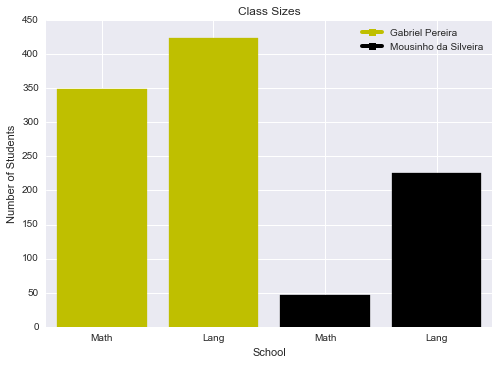

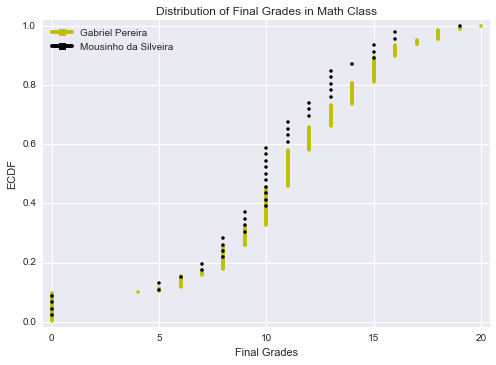

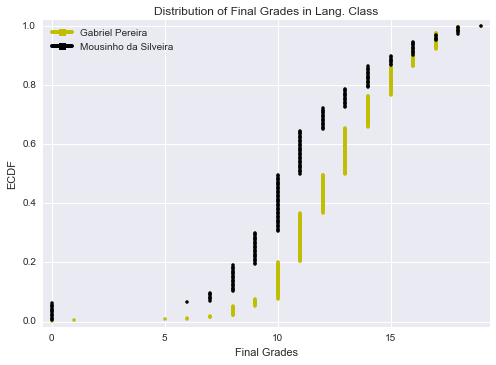

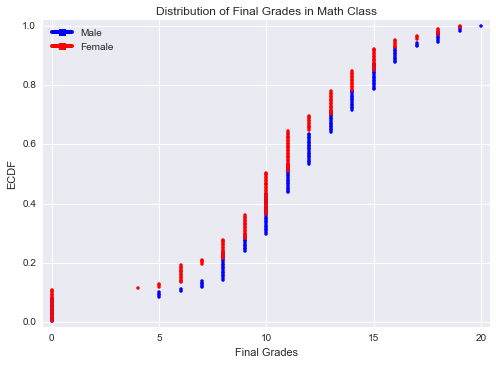

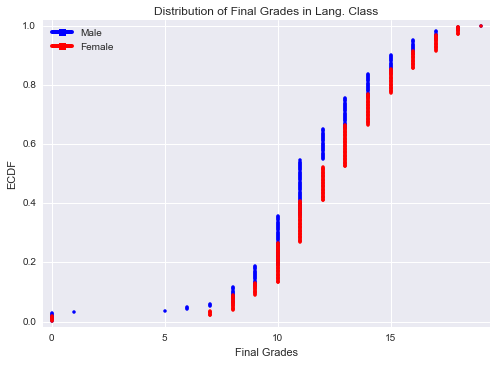

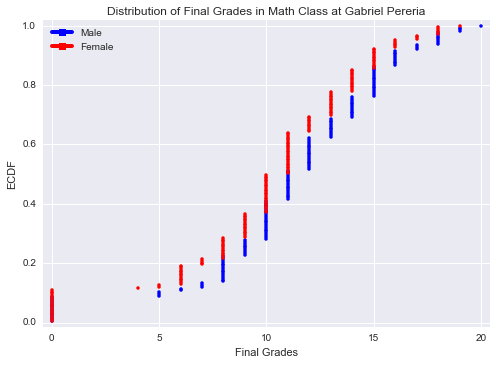

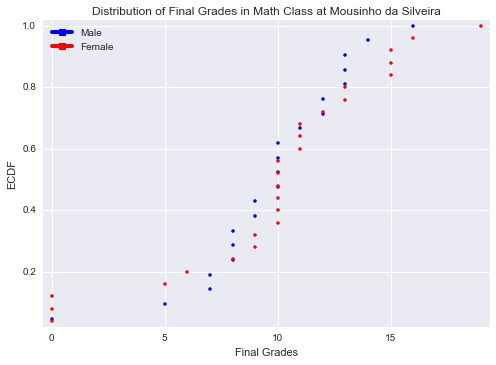

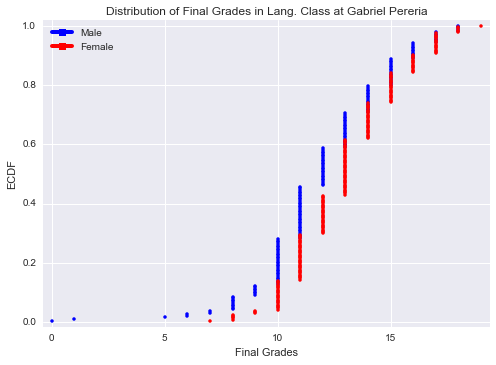

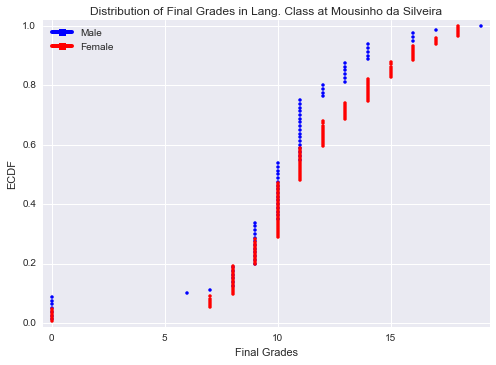

In [65]:
'This cell is dedicated to exploratory data analysis of the student performance datasets provided from the uci machine learning database'
'The url to the data is provided: https://archive.ics.uci.edu/ml/datasets/student+performance'

%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib.lines import Line2D

''' Below is a legend for the column names of each heart disease data set

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
2 sex - student's sex (binary: 'F' - female or 'M' - male) 
3 age - student's age (numeric: from 15 to 22) 
4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education) 
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
16 schoolsup - extra educational support (binary: yes or no) 
17 famsup - family educational support (binary: yes or no) 
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
19 activities - extra-curricular activities (binary: yes or no) 
20 nursery - attended nursery school (binary: yes or no) 
21 higher - wants to take higher education (binary: yes or no) 
22 internet - Internet access at home (binary: yes or no) 
23 romantic - with a romantic relationship (binary: yes or no) 
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
29 health - current health status (numeric: from 1 - very bad to 5 - very good) 
30 absences - number of school absences (numeric: from 0 to 93) 

# these grades are related with the course subject, Math or Portuguese: 
31 G1 - first period grade (numeric: from 0 to 20) 
31 G2 - second period grade (numeric: from 0 to 20) 
32 G3 - final grade (numeric: from 0 to 20, output target)
'''
# The data from the math and portugese(lang) csv files will be uploaded into a pandas dataframe below

df_math = pd.read_csv('student-math.csv',delimiter = ';',header=0)
df_lang = pd.read_csv('student-portugese.csv',delimiter= ';',header=0)
                      
# The .info()method and shape attribute will be used to get a sense of the data

df_math.info()
df_lang.info()

# The head and tail methods will be used on the dataframes to give us an idea of what is in the datasets

print df_math.head()
print df_math.tail()

print df_lang.head()
print df_lang.tail()

# There don't seem to be any missing entries so I will print both dataframes to double check

print df_math
print df_lang

# The describe method is used to glean more information about the data sets
print 'Math Class', df_math.describe()
print 'Language Class', df_lang.describe()

# I will create a bar graph of the number of studentes from each school to see if there are about equal in each class.

    #First I need to find the number of students in each school
gp_math = sum(df_math['school'] == 'GP')
gp_lang = sum(df_lang['school'] == 'GP')
ms_math = sum(df_math['school'] == 'MS')
ms_lang = sum(df_lang['school'] == 'MS')

student_school = [gp_math,gp_lang,ms_math,ms_lang]
student_school_labels = ['Math','Lang','Math','Lang']
y_pos2 = np.arange(len(student_school))


sns.set()
plt.figure(1)

SS_graph = plt.bar(y_pos2 ,height=student_school ,align='center')
SS_graph[0].set_color('y')
SS_graph[1].set_color('y')
SS_graph[2].set_color('k')
SS_graph[3].set_color('k')
_ = plt.xticks(y_pos2,student_school_labels)
_ = plt.xlabel('School')
_ = plt.ylabel('Number of Students')
_ = plt.title('Class Sizes')

legend_elements_2 = [Line2D([0], [0],marker='s', color='y', lw=4, label='Gabriel Pereira'),Line2D([0], [0],marker='s', color='k', lw=4, label='Mousinho da Silveira')]
_ = plt.legend(handles = legend_elements_2, loc= 'upper right')


    # The math classes are similar sizes however the english classes are not.

#I will divide both dataframes by school,sex,and by school and sex.

one_gp = df_math['school'] == 'GP'
two_gp = df_lang['school'] == 'GP'
three_ms = df_math['school'] == 'MS'
four_ms = df_lang['school'] == 'MS'

five_m = df_math['sex'] == 'M'
six_f = df_math['sex'] == 'F'
seven_m = df_lang['sex'] == 'M'
eight_f = df_lang['sex'] == 'F'

    # Math and Lang datasets divided by school
df_math_gp = df_math.loc[one_gp,:]
df_lang_gp = df_lang.loc[two_gp,:]
df_math_ms = df_math.loc[three_ms,:]
df_lang_ms = df_lang.loc[four_ms,:]

    # Math and Lang datasets divided by gender
df_math_m = df_math.loc[five_m,:]
df_lang_m = df_lang.loc[seven_m,:]
df_math_f = df_math.loc[six_f,:]
df_lang_f = df_lang.loc[eight_f,:]

    # Math and Lang datasets divided by school and gender
df_math_gp_m = df_math_gp.loc[five_m,:]
df_math_gp_f = df_math_gp.loc[six_f,:]
df_lang_gp_m = df_lang_gp.loc[seven_m,:]
df_lang_gp_f = df_lang_gp.loc[eight_f,:]
df_math_ms_m = df_math_ms.loc[five_m,:]
df_math_ms_f = df_math_ms.loc[six_f,:]
df_lang_ms_m = df_lang_ms.loc[seven_m,:]
df_lang_ms_f = df_lang_ms.loc[eight_f,:]

# Below I will create ECDF's to determine how test scores are distributd among the population.
# I will create these to compare schools, gender, and a mix of both, and I will display them on multiple figures


   #ECDF comparing final grades between students at each school for each class
        #function that creates the necessary variables for an ecdf

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n=float(len(data))

    # x-data for the ECDF: x
    x=np.sort(data)

    # y-data for the ECDF: y
    y= np.arange(1, n+1) / n
    
    return x, y
    
    # Variables necessary for ecdf's for each class are created below.
var, var_1 = ecdf(df_math_gp['G3'])
var_2, var_3 = ecdf(df_math_ms['G3'])
var_4, var_5 = ecdf(df_lang_gp['G3'])
var_6, var_7 = ecdf(df_lang_ms['G3'])
    
    # ECDF plot for the comparison of math scores between schools
plt.figure(2)
_ = plt.plot(var,var_1,marker='.',linestyle='none',color='y')
_ = plt.plot(var_2,var_3,marker='.',linestyle='none',color='k')
_ = plt.title('Distribution of Final Grades in Math Class')
_ = plt.xlabel('Final Grades')
_ = plt.ylabel('ECDF')
_ = plt.legend(handles = legend_elements_2, loc= 'best')
plt.margins(0.02)
    
    # ECDF plot for the comparison of language scores between schools
plt.figure(3)
_ = plt.plot(var_4,var_5,marker='.',linestyle='none',color='y')
_ = plt.plot(var_6,var_7,marker='.',linestyle='none',color='k')
_ = plt.title('Distribution of Final Grades in Lang. Class')
_ = plt.xlabel('Final Grades')
_ = plt.ylabel('ECDF')
_ = plt.legend(handles = legend_elements_2, loc= 'best')
plt.margins(0.02)


    #Variables necessary for plotting ECDF's comparing scores based on gender 
var_8, var_9 = ecdf(df_math_m['G3'])
var_10, var_11 = ecdf(df_math_f['G3'])
var_12, var_13 = ecdf(df_lang_m['G3'])
var_14, var_15 = ecdf(df_lang_f['G3'])

    # ECDF plot for the comparison of math scores between genders 
plt.figure(4)
_ = plt.plot(var_8,var_9,marker='.',linestyle='none',color='b')
_ = plt.plot(var_10,var_11,marker='.',linestyle='none',color='r')
_ = plt.title('Distribution of Final Grades in Math Class')
_ = plt.xlabel('Final Grades')
_ = plt.ylabel('ECDF')
legend_elements_3 = [Line2D([0], [0],marker='s', color='b', lw=4, label='Male'),Line2D([0], [0],marker='s', color='r', lw=4, label='Female')]
_ = plt.legend(handles = legend_elements_3, loc= 'best')
plt.margins(0.02)

    # ECDF plot for the comparison of lang scores between genders 
plt.figure(5)
_ = plt.plot(var_12,var_13,marker='.',linestyle='none',color='b')
_ = plt.plot(var_14,var_15,marker='.',linestyle='none',color='r')
_ = plt.title('Distribution of Final Grades in Lang. Class')
_ = plt.xlabel('Final Grades')
_ = plt.ylabel('ECDF')
legend_elements_3 = [Line2D([0], [0],marker='s', color='b', lw=4, label='Male'),Line2D([0], [0],marker='s', color='r', lw=4, label='Female')]
_ = plt.legend(handles = legend_elements_3, loc= 'best')
plt.margins(0.02)


    #Variables necessary for plotting ECDF's comparing scores based on gender and school 
var_16, var_17 = ecdf(df_math_gp_m ['G3'])
var_18, var_19 = ecdf(df_math_gp_f ['G3'])
var_20, var_21 = ecdf(df_math_ms_m ['G3'])
print len(var_20)
var_22, var_23 = ecdf(df_math_ms_f ['G3'])
print len(var_22)
var_24, var_25 = ecdf(df_lang_gp_m ['G3'])
var_26, var_27 = ecdf(df_lang_gp_f ['G3'])
var_28, var_29 = ecdf(df_lang_ms_m ['G3'])
var_30, var_31 = ecdf(df_lang_ms_f ['G3'])

    # ECDF plot for the comparison of math scores between genders at GP
plt.figure(6)
_ = plt.plot(var_16,var_17,marker='.',linestyle='none',color='b')
_ = plt.plot(var_18,var_19,marker='.',linestyle='none',color='r')
_ = plt.title('Distribution of Final Grades in Math Class at Gabriel Pereria')
_ = plt.xlabel('Final Grades')
_ = plt.ylabel('ECDF')
legend_elements_3 = [Line2D([0], [0],marker='s', color='b', lw=4, label='Male'),Line2D([0], [0],marker='s', color='r', lw=4, label='Female')]
_ = plt.legend(handles = legend_elements_3, loc= 'best')
plt.margins(0.02)

    # ECDF plot for the comparison of math scores between genders at MS 
plt.figure(7)
_ = plt.plot(var_20,var_21,marker='.',linestyle='none',color='b')
_ = plt.plot(var_22,var_23,marker='.',linestyle='none',color='r')
_ = plt.title('Distribution of Final Grades in Math Class at Mousinho da Silveira')
_ = plt.xlabel('Final Grades')
_ = plt.ylabel('ECDF')
legend_elements_3 = [Line2D([0], [0],marker='s', color='b', lw=4, label='Male'),Line2D([0], [0],marker='s', color='r', lw=4, label='Female')]
_ = plt.legend(handles = legend_elements_3, loc= 'best')
plt.margins(0.02)

    # ECDF plot for the comparison of lang scores between genders at GP
plt.figure(8)
_ = plt.plot(var_24,var_25,marker='.',linestyle='none',color='b')
_ = plt.plot(var_26,var_27,marker='.',linestyle='none',color='r')
_ = plt.title('Distribution of Final Grades in Lang. Class at Gabriel Pereria')
_ = plt.xlabel('Final Grades')
_ = plt.ylabel('ECDF')
legend_elements_3 = [Line2D([0], [0],marker='s', color='b', lw=4, label='Male'),Line2D([0], [0],marker='s', color='r', lw=4, label='Female')]
_ = plt.legend(handles = legend_elements_3, loc= 'best')
plt.margins(0.02)

    # ECDF plot for the comparison of lang scores between genders at MS
plt.figure(9)
_ = plt.plot(var_28,var_29,marker='.',linestyle='none',color='b')
_ = plt.plot(var_30,var_31,marker='.',linestyle='none',color='r')
_ = plt.title('Distribution of Final Grades in Lang. Class at Mousinho da Silveira')
_ = plt.xlabel('Final Grades')
_ = plt.ylabel('ECDF')
legend_elements_3 = [Line2D([0], [0],marker='s', color='b', lw=4, label='Male'),Line2D([0], [0],marker='s', color='r', lw=4, label='Female')]
_ = plt.legend(handles = legend_elements_3, loc= 'best')
plt.margins(0.02)


plt.show()







     mpg  cylinders  displacement  horsepower  weight  acceleration  \
0     18          8           307         130    3504          12.0   
1     15          8           350         165    3693          11.5   
2     18          8           318         150    3436          11.0   
3     16          8           304         150    3433          12.0   
4     17          8           302         140    3449          10.5   
5     15          8           429         198    4341          10.0   
6     14          8           454         220    4354           9.0   
7     14          8           440         215    4312           8.5   
8     14          8           455         225    4425          10.0   
9     15          8           390         190    3850           8.5   
10    15          8           383         170    3563          10.0   
11    14          8           340         160    3609           8.0   
12    15          8           400         150    3761           9.5   
13    

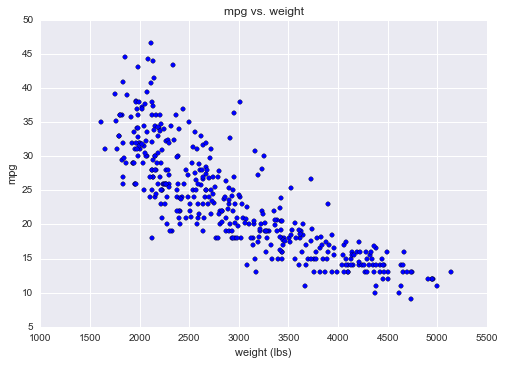

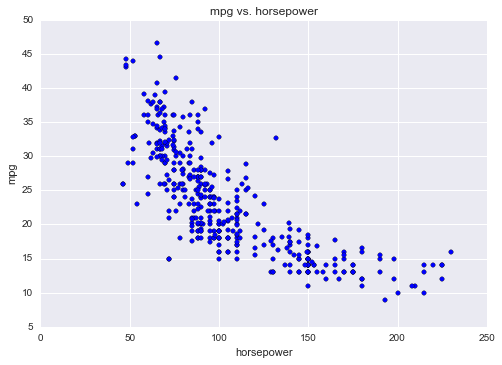

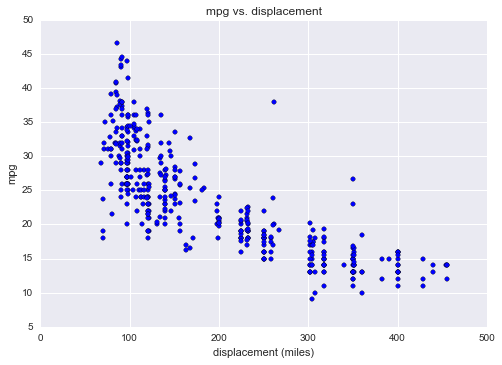

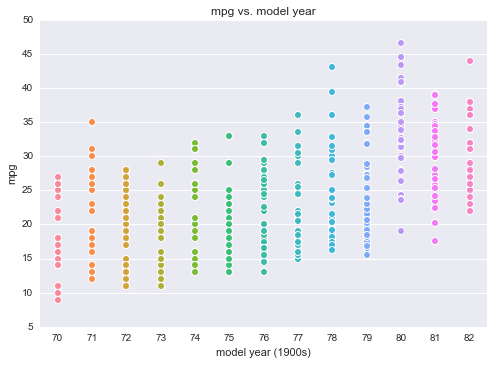

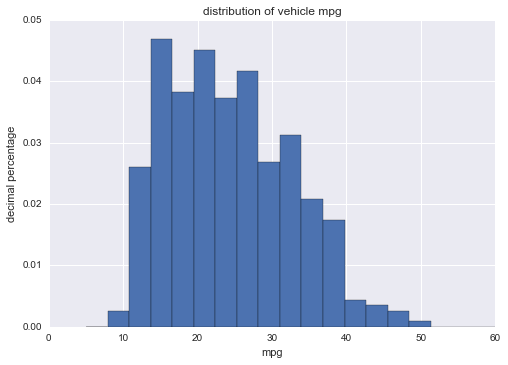

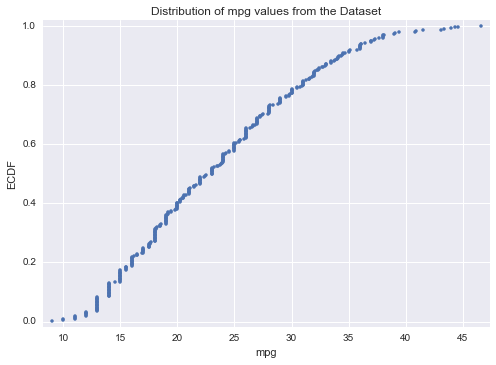

In [66]:
'This cell is dedicated to exploratory data analysis of the auto mpg data set provided from the uci machine learning database'
'The url to the data is provided: https://archive.ics.uci.edu/ml/datasets/auto+mpg'

%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

from matplotlib.lines import Line2D
'''
Attribute index 

1. mpg: continuous 
2. cylinders: multi-valued discrete 
3. displacement: continuous 
4. horsepower: continuous 
5. weight: continuous 
6. acceleration: continuous 
7. model year: multi-valued discrete 
8. origin: multi-valued discrete 
9. car name: string (unique for each instance)
'''

# The data is turned into a readable dataframe below.
attribute_names = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model year','origin','car name']

df_cars = pd.read_csv('auto-mpg.data', header = None, delim_whitespace= True, names = attribute_names, na_values= '?') 
print df_cars

# The describe method is used to glean more information about the data sets
print df_cars.describe()


# Plotting car mpg vs weight to see if there is any relation
sns.set()
plt.figure(1)
_ = plt.scatter(df_cars['weight'] ,df_cars['mpg'])
_ = plt.xlabel('weight (lbs)')
_ = plt.ylabel('mpg')
_ = plt.title('mpg vs. weight')
plt.show()

# Plotting mpg vs horsepower to see if there is any relation 
plt.figure(2)
_ = plt.scatter(df_cars['horsepower'] ,df_cars['mpg'])
_ = plt.xlabel('horsepower')
_ = plt.ylabel('mpg')
_ = plt.title('mpg vs. horsepower')

# Plotting mpg vs displacement to see if there is any relation 
plt.figure(3)
_ = plt.scatter(df_cars['displacement'] ,df_cars['mpg'])
_ = plt.xlabel('displacement (miles)')
_ = plt.ylabel('mpg')
_ = plt.title('mpg vs. displacement')


# Plotting mpg vs model year to see if there is any relation 
plt.figure(4)
_ = sns.stripplot(x='model year' ,y='mpg' ,data=df_cars)
_ = plt.xlabel('model year (1900s)')
_ = plt.ylabel('mpg')
_ = plt.title('mpg vs. model year')


# Plotting a histogram of mpg data to see what the distribution looks like
plt.figure(5)
car_length = len(df_cars)
bins_cars = np.sqrt(car_length)
_ = df_cars['mpg'].hist(bins=bins_cars,range=(5,60), normed=True)
_ = plt.xlabel('mpg')
_ = plt.ylabel('decimal percentage')
_ = plt.title('distribution of vehicle mpg')

#Plotting an ECDF of mpg values avaliable

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n=float(len(data))

    # x-data for the ECDF: x
    x=np.sort(data)

    # y-data for the ECDF: y
    y= np.arange(1, n+1) / n
    
    return x, y


plt.figure(6)
mpg_x, mpg_y = ecdf(df_cars['mpg'])
_ = plt.plot(mpg_x ,mpg_y ,marker='.' ,linestyle='none')
_ = plt.xlabel('mpg')
_ = plt.ylabel('ECDF') 
_ = plt.title('Distribution of mpg values from the Dataset')
plt.margins(0.02)


plt.show()



